In [69]:
import json
import numpy as np
from itertools import product
import matplotlib.pyplot  as plt

In [92]:
# Save the matrices to a JSON file
with open('matrices9by9.json', 'r') as f:
  matrices_data = json.load(f)

In [93]:
len(matrices_data)

100

In [94]:
qubo = np.array(matrices_data[6])*30
penalty_term = 5
hamming_weight = 3

In [95]:
for i in range(qubo.shape[0]):
    qubo[i, i] += penalty_term * (- 2 * hamming_weight)  # Hamming weight 페널티 적용
    for j in range(i + 1, qubo.shape[0]):
        qubo[i, j] +=  penalty_term
        qubo[j, i] +=  penalty_term  # 대칭성 유지

In [96]:
qubo

array([[-28.024524  ,   5.81090817,   6.92026282,   6.74480316,
          6.76273204,   6.70209583,   7.04857595,   6.62615039,
          4.2544014 ],
       [  5.81090817, -28.5472973 ,   5.810902  ,   5.6006006 ,
          5.73536036,   6.04504505,   5.43501835,   5.77745901,
          4.54932699],
       [  6.92026282,   5.810902  , -28.10394464,   6.60620134,
          6.66050443,   6.60387716,   6.91933837,   6.5759834 ,
          4.24963681],
       [  6.74480316,   5.6006006 ,   6.60620134, -28.01468135,
          6.66804304,   6.61649149,   7.04625922,   6.39551754,
          4.28903212],
       [  6.76273204,   5.73536036,   6.66050443,   6.66804304,
        -28.20706306,   6.56711712,   6.7853687 ,   6.59760594,
          4.58450842],
       [  6.70209583,   6.04504505,   6.60387716,   6.61649149,
          6.56711712, -27.84369369,   6.54763096,   6.4695365 ,
          3.99372396],
       [  7.04857595,   5.43501835,   6.91933837,   7.04625922,
          6.7853687 ,   6.5476

Optimal solution: None
Optimal value: inf


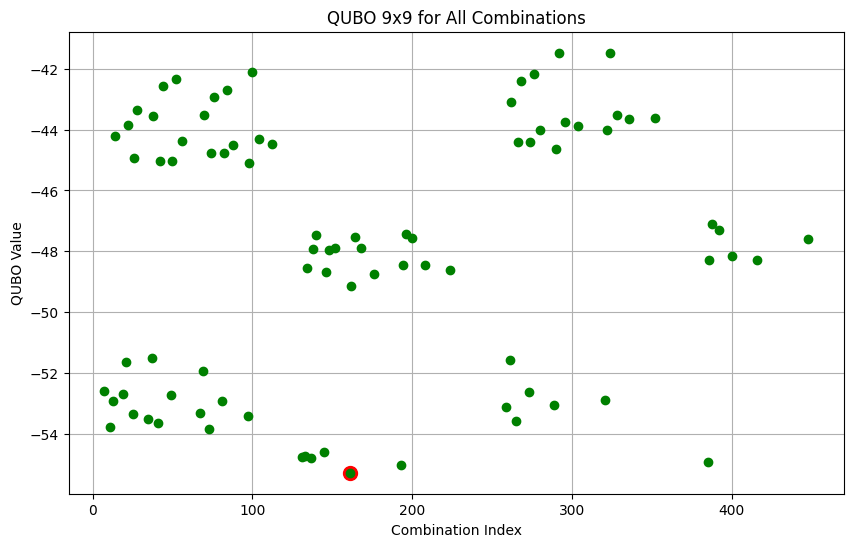

In [98]:
from itertools import product

# Generate all possible combinations of binary vector x
all_combinations = list(product([0, 1], repeat=qubo.shape[0]))

# Initialize variables to store the optimal solution and its value
best_solution = None
best_value = float('inf')

# Print the optimal solution and its value
print(f"Optimal solution: {best_solution}")
print(f"Optimal value: {best_value}")


# Plot all combinations and their corresponding values
combinations_values = [np.array(comb).T@qubo@np.array(comb) for comb in all_combinations]

plt.figure(figsize=(10, 6))
# plt.plot(range(len(all_combinations)), combinations_values, marker='o', linestyle='-', color='b')
plt.xlabel('Combination Index')
plt.ylabel('QUBO Value')
# Highlight even and odd combinations differently
min_idx = np.argmin(combinations_values)
plt.plot(min_idx, combinations_values[min_idx], marker='o', color='r', markersize=10)  # Red for minimum value
for idx, val in enumerate(combinations_values):
  if sum(all_combinations[idx]) == hamming_weight:
    plt.plot(idx, val, marker='o', color='g')  # Green for combinations with Hamming weight
  # else:
  #   plt.plot(idx, val, marker='o', color='b')  # Blue for odd indices

plt.title(f'QUBO {qubo.shape[0]}x{qubo.shape[0]} for All Combinations')
plt.grid(True)
plt.show()